# Khai báo thư viện

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

# Bước 1: Đọc dữ liệu từ các file data

## Đọc dữ liệu

In [2]:
salary_df = pd.read_csv('/content/drive/MyDrive/Hoc_Tap/CS116_LapTrinhPython/linear_regression/Salary_Data.csv')
salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
startups_df = pd.read_csv('/content/drive/MyDrive/Hoc_Tap/CS116_LapTrinhPython/linear_regression/50_Startups.csv')
startups_df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
PS_df = pd.read_csv('/content/drive/MyDrive/Hoc_Tap/CS116_LapTrinhPython/linear_regression/Position_Salaries.csv')
PS_df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Tiền xử lý dữ liệu

In [5]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
PS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [8]:
startups_df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [9]:
startups_df.loc[(startups_df.State == 'New York'), 'State'] = 0
startups_df.loc[(startups_df.State == 'California'), 'State'] = 1
startups_df.loc[(startups_df.State == 'Florida'), 'State'] = 2

In [10]:
startups_df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [11]:
salary_X = np.array(salary_df.drop(columns='Salary'))
salary_y = np.array(salary_df.Salary)
startups_X = np.array(startups_df.drop(columns='Profit'))
startups_y = np.array(startups_df.Profit)
PS_X = np.array(PS_df.Level).reshape(-1, 1)
PS_y = np.array(PS_df.Salary).reshape(-1, 1)

# Bước 2: Phân chia data thành train và test với K-fold cross validation

In [12]:
kf = KFold(n_splits=5, shuffle=True)

In [13]:
salary_X_train = []
salary_y_train = []
salary_X_test = []
salary_y_test = []

for train_idx, test_idx in kf.split(salary_X, salary_y):
  X_train, X_test = salary_X[train_idx], salary_X[test_idx]
  y_train, y_test = salary_y[train_idx], salary_y[test_idx]

  salary_X_train.append(X_train)
  salary_y_train.append(y_train)
  salary_X_test.append(X_test)
  salary_y_test.append(y_test)

salary_X_train = np.array(salary_X_train)
salary_y_train = np.array(salary_y_train)
salary_X_test = np.array(salary_X_test)
salary_y_test = np.array(salary_y_test)

In [14]:
startups_X_train = []
startups_y_train = []
startups_X_test = []
startups_y_test = []

for train_idx, test_idx in kf.split(startups_X, startups_y):
  X_train, X_test = startups_X[train_idx], startups_X[test_idx]
  y_train, y_test = startups_y[train_idx], startups_y[test_idx]

  startups_X_train.append(X_train)
  startups_y_train.append(y_train)
  startups_X_test.append(X_test)
  startups_y_test.append(y_test)

startups_X_train = np.array(startups_X_train)
startups_y_train = np.array(startups_y_train)
startups_X_test = np.array(startups_X_test)
startups_y_test = np.array(startups_y_test)

In [15]:
PS_X_train = []
PS_y_train = []
PS_X_test = []
PS_y_test = []

for train_idx, test_idx in kf.split(PS_X, PS_y):
  X_train, X_test = PS_X[train_idx], PS_X[test_idx]
  y_train, y_test = PS_y[train_idx], PS_y[test_idx]

  PS_X_train.append(X_train)
  PS_y_train.append(y_train)
  PS_X_test.append(X_test)
  PS_y_test.append(y_test)

PS_X_train = np.array(PS_X_train)
PS_y_train = np.array(PS_y_train)
PS_X_test = np.array(PS_X_test)
PS_y_test = np.array(PS_y_test)

# Bước 3: Chuẩn hóa dữ liệu

In [16]:
scaler = StandardScaler()

In [17]:
for i in range(len(startups_X_train)):
  startups_X_train[i] = scaler.fit_transform(startups_X_train[i])
  startups_X_test[i] = scaler.fit_transform(startups_X_test[i])

# Bước 4: Huấn luyện mô hình và trực quan hóa kết quả

## Simple Linear Regression

In [18]:
reg = LinearRegression()

Mean squared error: 30826423.78
Coefficient of determination: 0.95


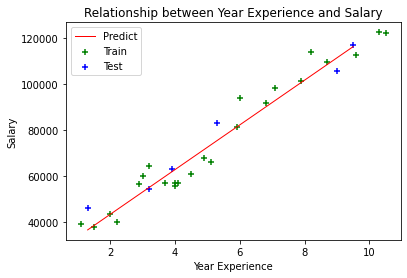

Mean squared error: 21485083.72
Coefficient of determination: 0.98


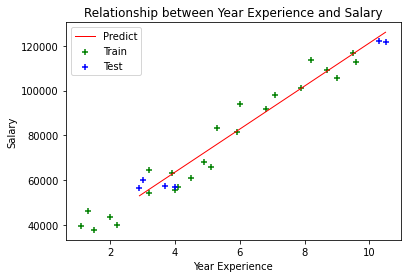

Mean squared error: 38974386.6
Coefficient of determination: 0.93


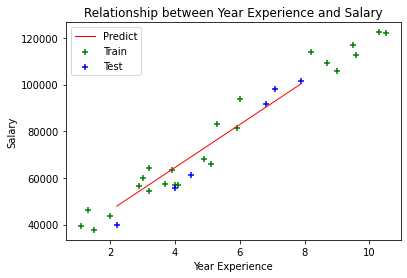

Mean squared error: 68514152.28
Coefficient of determination: 0.89


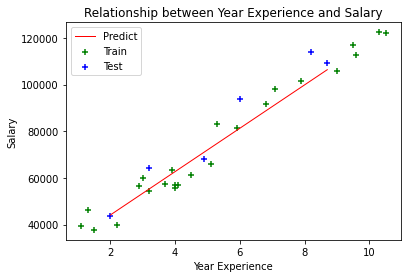

Mean squared error: 30255622.87
Coefficient of determination: 0.95


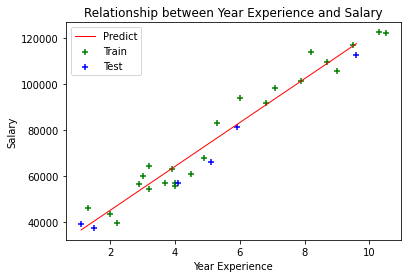

Average MSE: 38011133.85
Average R2 Score: 0.94


In [19]:
salary_y_predict = []
salary_mse = []
salary_r2_score = []

for i in range(len(salary_X_train)):
  reg.fit(salary_X_train[i], salary_y_train[i])
  
  y_predict = reg.predict(salary_X_test[i])
  salary_y_predict.append(y_predict)
  
  mse = mean_squared_error(salary_y_test[i], y_predict)
  salary_mse.append(mse)
  
  r2 = r2_score(salary_y_test[i], y_predict)
  salary_r2_score.append(r2)

  print(f'Mean squared error: {round(mse, 2)}')
  print(f'Coefficient of determination: {round(r2, 2)}')

  plt.scatter(salary_X_train[i], salary_y_train[i], label='Train', color = 'green',linewidths=0.1,marker='+')
  plt.scatter(salary_X_test[i], salary_y_test[i], label='Test',  color='blue',linewidths=1,marker='+')
  plt.plot(salary_X_test[i], y_predict, label='Predict', color='red', linewidth=1)
  plt.xlabel('Year Experience')
  plt.ylabel('Salary')
  plt.title('Relationship between Year Experience and Salary')
  plt.legend()
  plt.savefig(f'/content/drive/MyDrive/Hoc_Tap/CS116_LapTrinhPython/linear_regression/salary_visualization_{i+1}.png')
  plt.show()

print(f'Average MSE: {round(np.mean(salary_mse), 2)}')
print(f'Average R2 Score: {round(np.mean(salary_r2_score), 2)}')

## Multiple Linear Regression

Mean squared error: 1102781890.03
Coefficient of determination: -1.01


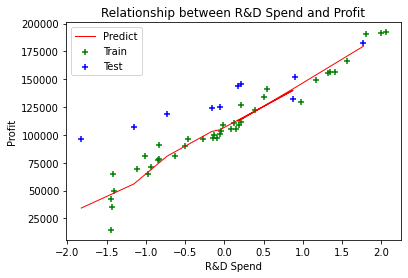

Mean squared error: 1359633565.85
Coefficient of determination: -0.8


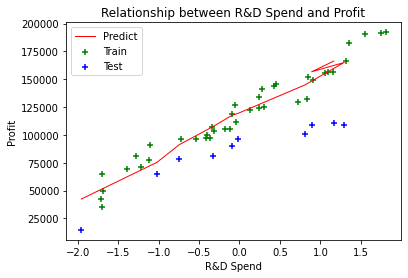

Mean squared error: 137723500.94
Coefficient of determination: 0.89


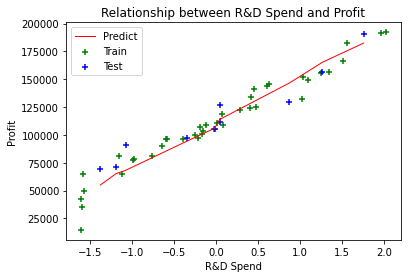

Mean squared error: 167565054.69
Coefficient of determination: 0.88


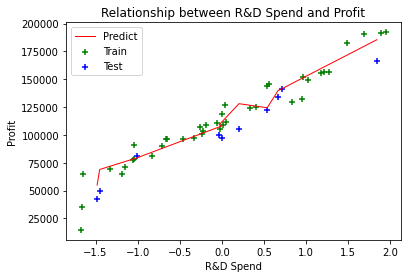

Mean squared error: 511724470.19
Coefficient of determination: 0.81


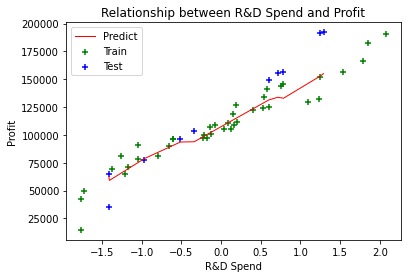

Average MSE: 655885696.34
Average R2 Score: 0.15


In [20]:
startups_y_predict = []
startups_mse = []
startups_r2_score = []

for i in range(len(startups_X_train)):
  reg.fit(startups_X_train[i], startups_y_train[i])
  
  y_predict = reg.predict(startups_X_test[i])
  startups_y_predict.append(y_predict)
  
  mse = mean_squared_error(startups_y_test[i], y_predict)
  startups_mse.append(mse)
  
  r2 = r2_score(startups_y_test[i], y_predict)
  startups_r2_score.append(r2)

  print(f'Mean squared error: {round(mse, 2)}')
  print(f'Coefficient of determination: {round(r2, 2)}')

  plt.scatter(startups_X_train[i,:,0], startups_y_train[i], label='Train', color = 'green',linewidths=0.1,marker='+')
  plt.scatter(startups_X_test[i,:,0], startups_y_test[i], label='Test',  color='blue',linewidths=1,marker='+')
  plt.plot(startups_X_test[i,:,0], y_predict, label='Predict', color='red', linewidth=1)
  plt.xlabel('R&D Spend')
  plt.ylabel('Profit')
  plt.title('Relationship between R&D Spend and Profit')
  plt.legend()
  plt.savefig(f'/content/drive/MyDrive/Hoc_Tap/CS116_LapTrinhPython/linear_regression/startups_visualization_{i+1}.png')
  plt.show()

print(f'Average MSE: {round(np.mean(startups_mse), 2)}')
print(f'Average R2 Score: {round(np.mean(startups_r2_score), 2)}')

## Support Vector Regression

In [21]:
SVR_model = SVR(C=1.0, epsilon=0.2)

Mean squared error: 7024571020.94
Coefficient of determination: -10.24


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


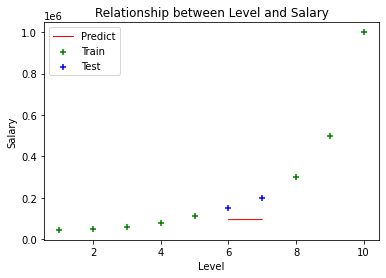

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 391623343676.03
Coefficient of determination: -0.98


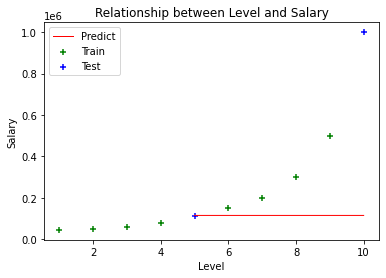

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 16262219873.21
Coefficient of determination: -2600.96


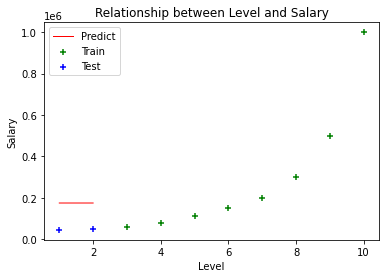

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 70898967661.42
Coefficient of determination: -0.46


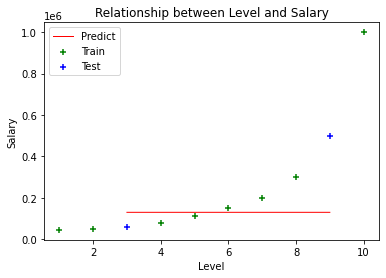

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 15699500019.39
Coefficient of determination: -0.3


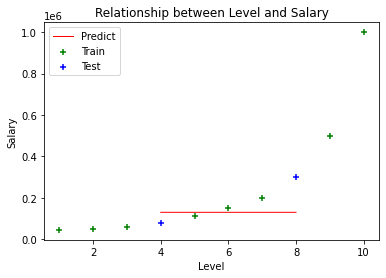

Average MSE: 100301720450.2
Average R2 Score: -522.59


In [22]:
PS_y_predict = []
PS_mse = []
PS_r2_score = []

for i in range(len(PS_X_train)):
  SVR_model.fit(PS_X_train[i], PS_y_train[i])
  
  y_predict = SVR_model.predict(PS_X_test[i])
  PS_y_predict.append(y_predict)
  
  mse = mean_squared_error(PS_y_test[i], y_predict)
  PS_mse.append(mse)
  
  r2 = r2_score(PS_y_test[i], y_predict)
  PS_r2_score.append(r2)

  print(f'Mean squared error: {round(mse, 2)}')
  print(f'Coefficient of determination: {round(r2, 2)}')

  plt.scatter(PS_X_train[i,:,0], PS_y_train[i], label='Train', color = 'green',linewidths=0.1,marker='+')
  plt.scatter(PS_X_test[i,:,0], PS_y_test[i], label='Test',  color='blue',linewidths=1,marker='+')
  plt.plot(PS_X_test[i,:,0], y_predict, label='Predict', color='red', linewidth=1)
  plt.xlabel('Level')
  plt.ylabel('Salary')
  plt.title('Relationship between Level and Salary')
  plt.legend()
  plt.savefig(f'/content/drive/MyDrive/Hoc_Tap/CS116_LapTrinhPython/linear_regression/PS_SVR_visualization_{i+1}.png')
  plt.show()

print(f'Average MSE: {round(np.mean(PS_mse), 2)}')
print(f'Average R2 Score: {round(np.mean(PS_r2_score), 2)}')

## Random Forest Regression

In [23]:
RFR_model = RandomForestRegressor(max_depth=2, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean squared error: 3548935361.11
Coefficient of determination: -4.68


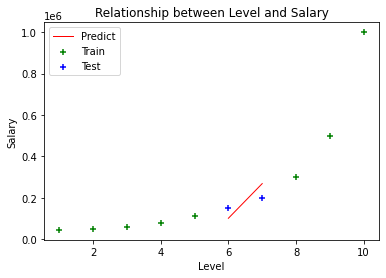

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean squared error: 164402956401.39
Coefficient of determination: 0.17


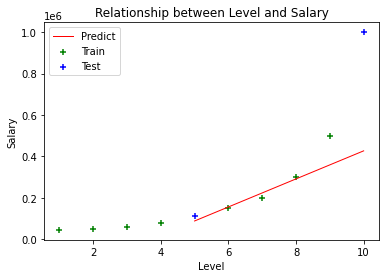

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean squared error: 2771782802.78
Coefficient of determination: -442.49


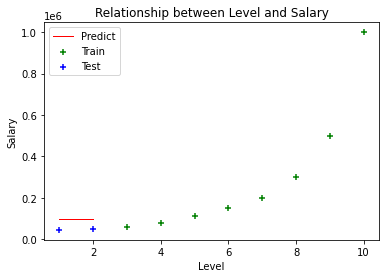

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean squared error: 217404513.89
Coefficient of determination: 1.0


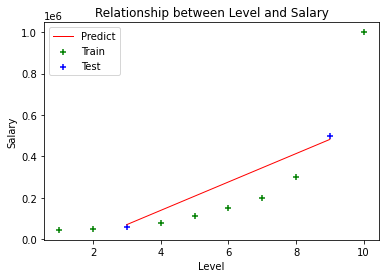

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean squared error: 294740944.44
Coefficient of determination: 0.98


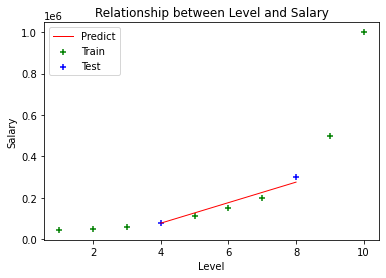

Average MSE: 34247164004.72
Average R2 Score: -89.0


In [24]:
PS_y_predict = []
PS_mse = []
PS_r2_score = []

for i in range(len(PS_X_train)):
  RFR_model.fit(PS_X_train[i], PS_y_train[i])
  
  y_predict = RFR_model.predict(PS_X_test[i])
  PS_y_predict.append(y_predict)
  
  mse = mean_squared_error(PS_y_test[i], y_predict)
  PS_mse.append(mse)
  
  r2 = r2_score(PS_y_test[i], y_predict)
  PS_r2_score.append(r2)

  print(f'Mean squared error: {round(mse, 2)}')
  print(f'Coefficient of determination: {round(r2, 2)}')

  plt.scatter(PS_X_train[i,:,0], PS_y_train[i], label='Train', color = 'green',linewidths=0.1,marker='+')
  plt.scatter(PS_X_test[i,:,0], PS_y_test[i], label='Test',  color='blue',linewidths=1,marker='+')
  plt.plot(PS_X_test[i,:,0], y_predict, label='Predict', color='red', linewidth=1)
  plt.xlabel('Level')
  plt.ylabel('Salary')
  plt.title('Relationship between Level and Salary')
  plt.legend()
  plt.savefig(f'/content/drive/MyDrive/Hoc_Tap/CS116_LapTrinhPython/linear_regression/PS_RFR_visualization_{i+1}.png')
  plt.show()

print(f'Average MSE: {round(np.mean(PS_mse), 2)}')
print(f'Average R2 Score: {round(np.mean(PS_r2_score), 2)}')